# Binary Classification with Feed Forward Neural Networks in Keras

From now on, we will start working with Keras and Neural Networks. 
In this notebook, as an introduction to the topic, a binary classification task will be solved and several approaches to evaluating a neural network's training and performance will be given.

The task will be building and training a feed forward NN classifier on the [NBA Rookie Dataset](https://data.world/exercises/logistic-regression-exercise-1), which contains the game stats for the first season of ~1300 new players in the NBA. Your task will be building a classifier to estimate which of them will still be playing after 5 years.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import ReLU
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")
print('Keras Version: ' + keras.__version__)
print('Tensorflow Version: ' + tf.__version__)

Keras Version: 2.2.4-tf
Tensorflow Version: 2.0.0


Using TensorFlow backend.


In [2]:
data = pd.read_csv('nba_rookies.csv')
data=data.dropna(axis=0, how='any')

X = data.iloc[:,1:-1]
y = data.iloc[:,-1].to_numpy().astype(np.int32)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

_Remark_: As we can see there is a higher number of players who had been active for more than five years after their first rookies season. The dataset is imbalanced! sklearn's `train_test_split()` is splitting categorical data by default with stratification. You can see that that the test set has a similar imbalance.

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


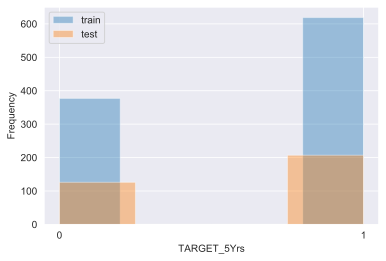

In [3]:
sns.distplot(y_train,kde=False,label='train')
plt.xlabel('TARGET_5Yrs')
sns.distplot(y_test, kde=False, label='test')
plt.ylabel('Frequency')
plt.xticks([0,1])
plt.legend()
data

_Remark_: We apply a standardization to the data. Of course it might be worthy to try out different pre-processing steps. 

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In Keras, the _SequentialAPI_ can be used to define a neural network where layers can be "stacked" to each other. Each time `Sequential.add()` is called, a new layer gets attached to the end of the network. You have to define input and output shape only, the _SequentialAPI_ does the job of defining the shapes for you in all intermediate layers. This API is easy to understand and very intuitive. In later tasks we will also cover the usage of the _FunctionalAPI_. 

An example for two fully connected (dense) feed forward layers - with 10 and 5 neurons respectively - would be: 

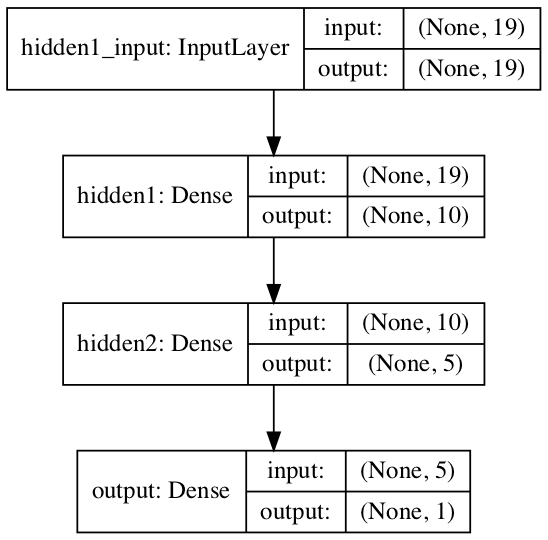

In [5]:
def build_model():
    mlp = Sequential()
    mlp.add(Dense(10,input_shape=(X_train.shape[1],),activation='relu',name="hidden1"))
    mlp.add(Dense(5, activation='relu',name="hidden2"))
    mlp.add(Dense(1, activation='sigmoid',name="output"))
    mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
   
    return mlp

model = build_model()
plot_model(model, show_shapes=True,show_layer_names=True,dpi=128)

As you can see in this example, the above call builds a neural network that has an input layer with 4 neurons (for 4 features), and then two hidden layers and an output layer. The build_function is used so that the model can be parametrized and grid searches can be performed.

**Task:** Create a function `build_model()`. Using the _SequentialAPI_ model define a model with three hidden layers. Two of the three inputs should be the activation function. The third parameter should be a scalar used as a factor to multiply the number of neurons in each layer, for example: `Dense(size_fac*3, ...)`. In the example we used 3, find a reasonable number for each layer to multiply with the _size_fac_. You can then easily change the number of neurons in all layers at once by increasing or decreasing _size_fac_. Choose sensible values for the layer sizes (depending on the amount of input features and fan out/fan in principles).

_Remark_: We chose 3 layers somewhat arbitrary. It might also be an idea to use more neurons in a layer and a less deep net - for this particular dataset. In MLP's ReLU is chosen often as activation function to serve as a starting point when developing a neural net. The binary cross-entropy is a common loss function used in classification tasks (not only in deep learning). It is also common in two class problems to use the sigmoid as output activation function - the last layer mimics a logistic regression. Predictions can be interpreted as probabilites as the sigmoid maps all values to the range $[0,1]$. 

For teaching and small experiments it will always somehow be hard to provide deep learning examples due to the computational complexity. Always feel free to adopt parameters and/or code to let the examples run in adequate duration!

In [6]:
def build_model(act_fun='relu',loss_fun='binary_crossentropy',size_fac=1):
    mlp = Sequential()
    mlp.add(Dense(int(size_fac*5),input_shape=(X_train.shape[1],),activation=act_fun,name="hidden1"))
    mlp.add(Dense(int(size_fac*3),activation=act_fun,name="hidden2"))
    mlp.add(Dense(int(size_fac*2), activation=act_fun,name="hidden3"))
    
    mlp.add(Dense(1, activation='sigmoid',name="output"))
    mlp.compile(loss=loss_fun, optimizer='adam', metrics=['accuracy'])
    return mlp

Now that we have the build function, we can get and train a model. 

In [7]:
model = build_model(act_fun='relu',loss_fun='binary_crossentropy',size_fac=12)
model.summary()
model.fit(X_train, y_train, batch_size=32, epochs=50,verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 60)                1200      
_________________________________________________________________
hidden2 (Dense)              (None, 36)                2196      
_________________________________________________________________
hidden3 (Dense)              (None, 24)                888       
_________________________________________________________________
output (Dense)               (None, 1)                 25        
Total params: 4,309
Trainable params: 4,309
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
996/996 [==============================] - 1s 1ms/step - loss: 0.6242 - accuracy: 0.6536
Epoch 2/50
996/996 [==============================] - 0s 114us/step - loss: 0.5759 - accuracy: 0.6867
Epoch 3/50
996/996 [============================

Great, now that we've (over-)fit the model, we can try to evaluate the predictor on the testing set.

**Task:** Use `model.evaluate()` to check accuracy on our testing set.

In [8]:
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

333/333 [==============================] - 0s 853us/step
test loss, test acc: [0.8123997881247833, 0.6636636853218079]


_Remark_: We can see that we did a great job in overfitting the model. The accuracy in training is close to $90\%$ but the performance on the test set is not very satisfying.

A great way to get more information about classification performance is a confusion matrix plot, which shows us true predictions on the diagonal, and false positive/false negative predictions on the orther fields.

**Task**: Create a confusion matrix for both train and test set predictions! 

_Remark_: The convertion used in sklearn might be different than in some literature. Of course you can flip/mirror/transpose the confusion matrix to a style you preferre. Here is a citation from the [sklearn documentation `confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):
_"Thus in binary classification, the count of true negatives is $C_{0,0}$ , false negatives is $C_{1,0}$ , true positives is $C_{1,1}$ and false positives is $C_{0,1}$."_

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_train = model.predict_classes(X_train)
y_pred_train = np.rint(model.predict(X_train))
y_pred_test =  np.rint(model.predict(X_test))

conf_train = confusion_matrix(y_train,y_pred_train)
conf_test = confusion_matrix(y_test,y_pred_test)
print(conf_train)
print(conf_test)

[[348  29]
 [ 91 528]]
[[ 83  43]
 [ 69 138]]


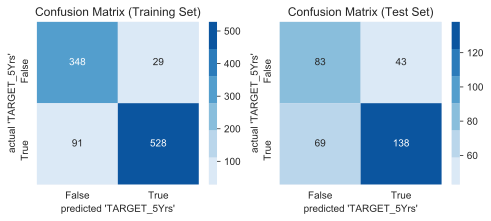

In [10]:
plt.figure(figsize=(8,3))
plt.subplot(121)
ax = sns.heatmap(conf_train, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix (Training Set)")
plt.subplot(122)
ax = sns.heatmap(conf_test, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix (Test Set)")
plt.show()

_Remark_: We can see a string diagonal for the training set results. We have some false positives and a little bit more false negatives. For the test set we can see a bad perfomance in predicting negative targets. We have a similar amount of flase negatives and even a higher amount of false positives. To give this values a meaning, we will evaluate an "All-Ones-Classifier" in the next cell. 

All-1-Classifier Training Accuracy: 0.6214859437751004
All-1-Classifier Test Accuracy: 0.6216216216216216


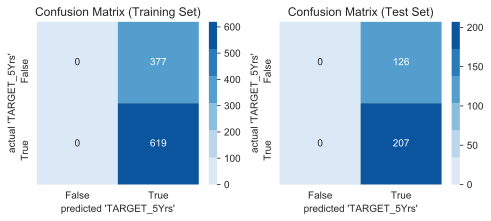

In [11]:
conf_train = confusion_matrix(y_train,np.ones(y_train.shape))
conf_test = confusion_matrix(y_test,np.ones(y_test.shape))
print('All-1-Classifier Training Accuracy: ' + str(accuracy_score(y_train,np.ones(y_train.shape))))
print('All-1-Classifier Test Accuracy: ' + str(accuracy_score(y_test,np.ones(y_test.shape))))

plt.figure(figsize=(8,3))
plt.subplot(121)
ax = sns.heatmap(conf_train, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix (Training Set)")
plt.subplot(122)
ax = sns.heatmap(conf_test, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix (Test Set)")
plt.show()

## Monitoring Training, Preventing Overfitting, and Callbacks

Overfitting is something that you have to pay close attention to when designing and training neural networks. Especially for simpler problems, bigger networks tend to overfit quickly. 
An important tool to monitor this is passing validation data after each epoch or batch and plotting a curve of the training epochs.

**Task**: Fit the model again in a way that performs validation after each epoch, the lazy way to do this is to use the _validation_split_ argument of the `model.fit()`function. Pay attention to assign the output of the `model.fit()`function to a variable called _history_. After training, use the history to plot training and validation accuracy to find the epoch where the model starts to overfit.


_Remark_: When choosing the best model - you have to ask yourself about the best measure to decide about the best model. In many examples and tutorials you will see plots of loss functions and also of the accuracy. The lowest validation-cross-entropy does not neccesarily lead to the lowest accuracy. Accuracy is a metric based on "hard" threshold, i.e. it is computed from discrete values (True/False). Cross-entropy is continuous and therefore it can happen that the validation plots of accuracy and cross-entropy can be counter-intuitive on a first glance. But this is due to the fact, that cross-entropy models also the confidence of a model (i.e. a estimated correctly probability of 0.51 sounds not very confident - but it would lead to a true positive and give you a higher accuracy).

In [12]:
model = build_model(act_fun='relu',loss_fun='binary_crossentropy',size_fac=12)
history = model.fit(X_train, y_train,validation_split=0.25, batch_size=32, epochs=50,verbose=0)

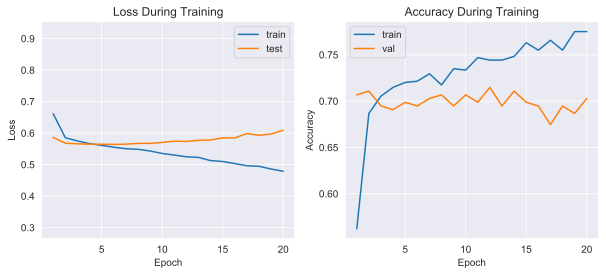

In [13]:
ep=20
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(np.arange(1,ep+1, dtype='int'),history.history['loss'][:ep])
plt.plot(np.arange(1,ep+1, dtype='int'),history.history['val_loss'][:ep])
plt.title('Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(np.min(history.history['loss']),np.max(history.history['val_loss'])+.1)
plt.legend(['train', 'test'], loc='upper right')
plt.subplot(122)
plt.plot(np.arange(1,ep+1),history.history['accuracy'][:ep])
plt.plot(np.arange(1,ep+1),history.history['val_accuracy'][:ep])
plt.title('Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

As we see, there's usually a sweet spot between training too little and training too much, and ideally we would want to stop training after reaching it. In keras, this can be done using an so called Early Stopper. The _callback_list_ argument of the `model.fit()` function takes so called callbacks. This functions will be called after each epoch. 

**Task**: Use an `EarlyStopping()` callback to monitor validation loss and stop training after if the validation loss is not longer decrasing for some epochs. Use `ModelCheckpoint()` to save and restore the best weights of the network found during training.

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = build_model(act_fun='relu',loss_fun='binary_crossentropy',size_fac=100)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
mc = ModelCheckpoint("best_epoch.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [es,mc]
history = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size=32, callbacks=callbacks_list, verbose=1)
model.load_weights('best_epoch.h5')
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

Train on 747 samples, validate on 249 samples
Epoch 1/50
747/747 [==============================] - 2s 2ms/step - loss: 0.6010 - accuracy: 0.6774 - val_loss: 0.5690 - val_accuracy: 0.7028

Epoch 00001: val_loss improved from inf to 0.56897, saving model to best_epoch.h5
Epoch 2/50
747/747 [==============================] - 0s 332us/step - loss: 0.5771 - accuracy: 0.6975 - val_loss: 0.5700 - val_accuracy: 0.7149

Epoch 00002: val_loss did not improve from 0.56897
Epoch 3/50
747/747 [==============================] - 0s 349us/step - loss: 0.5664 - accuracy: 0.7135 - val_loss: 0.5748 - val_accuracy: 0.7189

Epoch 00003: val_loss did not improve from 0.56897
Epoch 4/50
747/747 [==============================] - 0s 334us/step - loss: 0.5531 - accuracy: 0.7015 - val_loss: 0.5807 - val_accuracy: 0.6988

Epoch 00004: val_loss did not improve from 0.56897
Epoch 5/50
747/747 [==============================] - 0s 325us/step - loss: 0.5513 - accuracy: 0.7189 - val_loss: 0.5871 - val_accuracy: 0.69

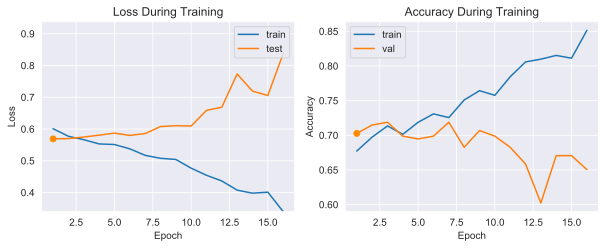

In [15]:
idx_minloss = np.argmin(history.history['val_loss'])
plt.figure(figsize=(10,3.5))
plt.subplot(121)
plt.plot(np.asarray(history.epoch)+1,history.history['loss'])
plt.plot(np.asarray(history.epoch)+1,history.history['val_loss'])
plt.plot(idx_minloss+1,history.history['val_loss'][idx_minloss],marker='o', color='darkorange')
plt.title('Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(np.min(history.history['loss']),np.max(history.history['val_loss'])+.1)
plt.legend(['train', 'test'], loc='upper right')
plt.subplot(122)
plt.plot(np.asarray(history.epoch)+1,history.history['accuracy'])
plt.plot(np.asarray(history.epoch)+1,history.history['val_accuracy'])
plt.plot(idx_minloss+1,history.history['val_accuracy'][idx_minloss],marker='o', color='darkorange')
plt.title('Accuracy During Training')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

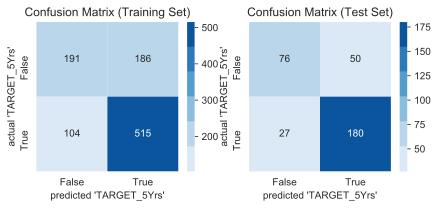

In [16]:
y_pred_train = np.rint(model.predict(X_train))
y_pred_test =  np.rint(model.predict(X_test))

conf_train = confusion_matrix(y_train,y_pred_train)
conf_test = confusion_matrix(y_test,y_pred_test)

plt.figure(figsize=(7,2.75))
plt.subplot(121)
ax = sns.heatmap(conf_train, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix (Training Set)")

plt.subplot(122)
ax = sns.heatmap(conf_test, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix (Test Set)")
plt.show()

## Batch Size and Convergence

You may have noticed by now that `model.fit()`in keras takes a parameter called _batch_size_. A batch is the bunch of samples that are passed through the network before a weight update is performed, and it can greatly affect your model's training. On the one hand, increasing the batch size can considerably speed up training time, on the other hand the model can take significantly more epochs until convergence if the batch size is too high (because there are less weight updates).

_Remark:_ In the next cell we are comparing 4 runs of the same model but with a different batch size. We have to take great care by running such experiments especially if randomness is involved! Weights are initialized randomly. The best way to compare performance - or in this case time till convergence - is to run a sufficient amount of experiments. Then we can take some statistics (mean value, variance or robust measures like median) to compare the models. If we can not or do not want to spend extra runs we could at least make use of a random seed/random state.  

**Task**: Generate a model and train it four times, with batch_size 1,8,32 and 128. train for 100 epochs each and generate a training plot. Compare convergence times using the "time" library.

training model with batch size 1
training model with batch size 8
training model with batch size 32
training model with batch size 128


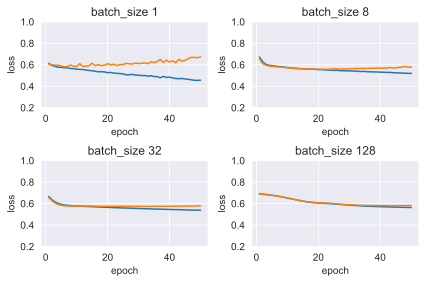

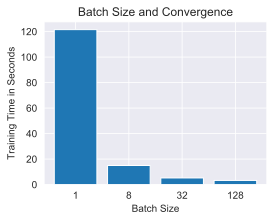

In [17]:
import time
batch_sizes = [1,8,32,128]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,4))
axs = axs.reshape(-1)
ep = 50
training_times = []

for i,bs in enumerate(batch_sizes,0):
    start = time.time()
    print("training model with batch size %s" %(bs))
    model = build_model(act_fun='relu',loss_fun='binary_crossentropy',size_fac=2)
    history = model.fit(X_train, y_train,validation_split=0.25, batch_size=bs, epochs=ep,verbose=0)
    plt.sca(axs[i])
    plt.plot(np.arange(1,ep+1),history.history['loss'][:ep])
    plt.plot(np.arange(1,ep+1),history.history['val_loss'][:ep])
    axs[i].set(xlabel="epoch",ylabel="loss",title="batch_size "+str(bs),ylim=(0.2,1))
    training_times.append(time.time()-start)
fig.tight_layout(pad=1.0)

fig2 = plt.figure(figsize=(4,3))
plt.bar(np.arange(0,4),training_times)
plt.xticks(ticks=[0,1,2,3], labels=["1","8","32","128"])
plt.xlabel("Batch Size")
plt.ylabel("Training Time in Seconds")
plt.title("Batch Size and Convergence")
plt.show()

## Sklearn Wrappers and Receiver-Operator-Curve

To integrate our keras models into our sklearn-workflow, keras provides the `KerasClassifier()` wrapper, which enables us to use sklearn methods with keras models.

Here we build a `KerasClassifier` from our keras model and train it using an earlystopping checkpoint. 

In [18]:
from keras.wrappers.scikit_learn import KerasClassifier

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)
mc = ModelCheckpoint("best_epoch.h5", monitor='val_loss', verbose=0, save_best_only=True, mode='min')
callbacks_list = [es,mc]

estimator = KerasClassifier(build_fn=build_model,size_fac=12,act_fun='relu',callbacks=callbacks_list,loss_fun='binary_crossentropy')
estimator.fit(X_train,y_train,epochs=100, batch_size=8, validation_split=0.25, verbose=0)
estimator.score(X_test,y_test)

333/333 [==============================] - 0s 52us/step


0.7147147059440613

ROC curves can be a great tool to visualize your classification. An ROC curve illustrates how shifting the classification threshold towards true or false can affect your predictions. This is very useful in cases where we want to see the tradeoff between false positives and false negatives.

**Task**: Use the sklearn KerasClassifier to generate an ROC curve for your trained classifer.


_Remark_: The ROC curve is computed by shifting the threshold for the classification up and down. The straight-forward approach is to decide for _True_ if the predicted probability is greater $0.5$ and _False_ otherwise. The ROC curve shows us a trajectory for all reachable points by our classifier. Remember, a perfect classifier would give us a TPR of 1 and a FPR of 0 (top left in the plot). As you can see we can get a higher TPR if we allow more false positives. If it is important to avoid false positives this will cost some percentage of the TPR - No free candy, thugh!

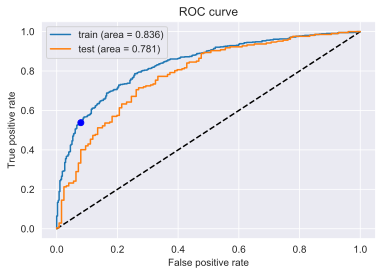

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_proba_train = estimator.predict_proba(X_train)
y_proba_test = estimator.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_train,y_proba_train[:,1])
fprt, tprt, thresholds = roc_curve(y_test,y_proba_test[:,1])


auc_train = auc(fpr, tpr)
auc_test = auc(fprt, tprt)
idx05 = np.argmin(np.abs(thresholds-.5))

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='train (area = {:.3f})'.format(auc_train))
plt.plot(fprt, tprt, label='test (area = {:.3f})'.format(auc_test))
plt.plot(fpr[idx05], tpr[idx05],marker='o', color='blue')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


_Remark_: In addition to the ROC curve we can also use sklearn to plot the precistion-recall curve. We see recall and precision for different thresholds (where to decide for a '1' and '0').
For a certain application we can fine-tune the performance to match our desired task. Precision relates the TP to the sum of all positive predictions TP/(TP+FP) whereas recall is given as TP/(TP+FN). T reach a recall close to one we have to avoid false negatives. So this gives us somehow a probabilty of detecting a player who will still be active in 5 years (Recall is often called Sensitivity). For a high precision we try to avoid false positives.

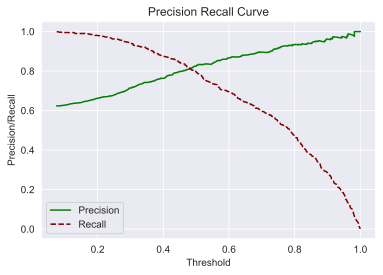

In [20]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba_train[:,1])
plt.figure()
plt.plot(thresholds, precisions[:-1], label="Precision", color='green')
plt.plot(thresholds, recalls[:-1], "--", label="Recall", color='maroon')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.title('Precision Recall Curve')
plt.legend(loc='best')
plt.show()

If we would consider recall to be as important as precision for our task, we can set find the best threshold at the intersection of both curves.

In [21]:
eq_thr = thresholds[np.argmin(np.abs(precisions-recalls))]
print('Threshold for balanced precision and recall:' + str(eq_thr))

Threshold for balanced precision and recall:0.4806009


For threshold = 0.80: recall = 0.36 -- precision = 0.88


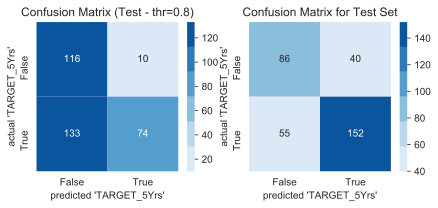

In [22]:
thr = eq_thr
thr = 0.8
y_pred_test_eq = y_proba_test>=thr
y_pred_test = y_proba_test>=.5
conf_test_eq = confusion_matrix(y_test,y_pred_test_eq[:,1])
print('For threshold = %.02f: recall = %0.2f -- precision = %0.2f' % (thr, recall_score(y_test,y_pred_test_eq[:,1]), precision_score(y_test,y_pred_test_eq[:,1])))
conf_test = confusion_matrix(y_test,y_pred_test[:,1])

plt.figure(figsize=(7,2.75))
plt.subplot(121)
ax = sns.heatmap(conf_test_eq, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix (Test - thr=%0.1f)" % thr)


plt.subplot(122)
ax = sns.heatmap(conf_test, annot=True, fmt="d",cmap=sns.color_palette("Blues"))
ax.set(xticklabels=["False","True"])
ax.set(yticklabels=["False","True"])
ax.set(xlabel="predicted 'TARGET_5Yrs'")
ax.set(ylabel="actual 'TARGET_5Yrs'")
ax.set(title="Confusion Matrix for Test Set")
plt.show()